In [1]:
import os
current_directory = os.getcwd()
if current_directory.split('/')[-1] == 'demo':
    os.chdir('..')
    
import numpy as np
import cv2
import matplotlib.pyplot as plt
from models.utils.torch_geometry import euler_angles_to_matrix
from models.utils.utils import get_BEV_tensor, get_BEV_projection

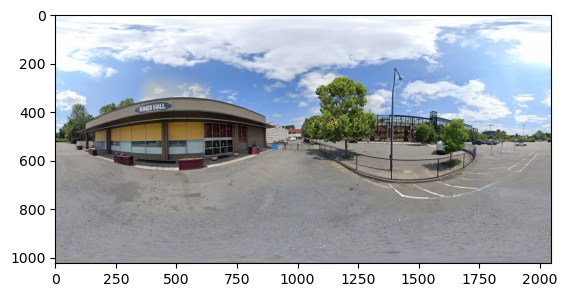

In [2]:
import requests

image_url=  "https://img.onl/zW1AUD"
headers ={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36'
}

r = requests.get(image_url,headers=headers)
arr =  np.asarray(bytearray(r.content), dtype=np.uint8)
img = cv2.imdecode(arr, -1)[:,:,::-1]
plt.imshow(img)

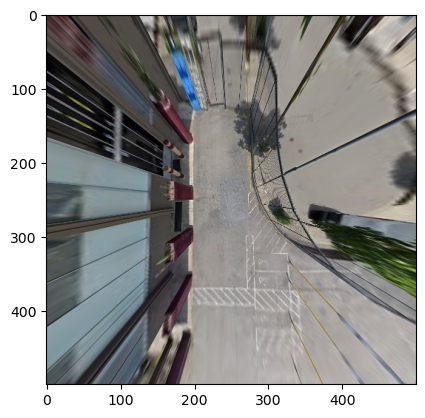

In [3]:
out = get_BEV_projection(img,500,500,Fov = 170, dty = 0, dx = 0, dy = -10)
BEV = get_BEV_tensor(img,500,500,Fov = 85*2, dty = 0, dx = 0, dy = 0, out = out).cpu().numpy().astype(np.uint8)
plt.imshow(BEV)

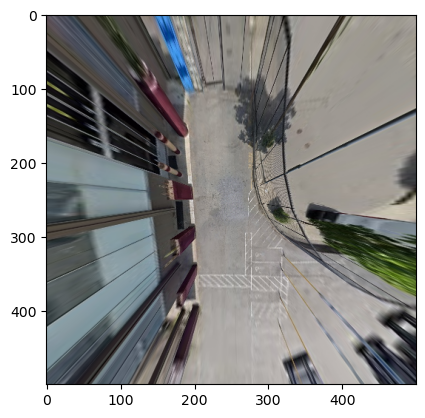

In [4]:
BEV = get_BEV_tensor(img,500,500,Fov = 85*2, dty = 0, dx = 0, dy = 0, out = None, device='cuda').cpu().numpy().astype(np.uint8)
plt.imshow(BEV)